# Import stuff 


In [8]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

path = '/Users/alessiogandelli/dev/uni/reddit-disagreement/data/data-tidy/user_nodelist_per_post.csv'

df = pd.read_csv(path)
print(len(df))

4437911


# cleaning and preparation

since we are interested in the votes per users, we first drop the users that do not have any flairs, thus never voted

In [9]:
df = df.dropna(subset=['flairs'])
df['flairs'] = df['flairs'].astype(str)
print(len(df))


2955006


the unstructured column flairs contains a list of votes the users expressed, we will extract the votes and create a new column for each vote, also a n_comments and n_votes columns are created

In [10]:
df.loc[:, 'n_comments'] = df['flairs'].apply(lambda x: len(x.split(',')))
df.loc[:, 'n_votes'] = df['flairs'].apply(lambda x: len(set([i for i in x.split(',') if i.strip() != ''])))# %%

df.loc[:, 'NTA_votes'] = df['flairs'].apply(lambda x: len([i for i in x.split(',') if i.strip() == 'NTA']))
df.loc[:, 'YTA_votes'] = df['flairs'].apply(lambda x: len([i for i in x.split(',') if i.strip() == 'YTA']))
df.loc[:, 'ESH_votes'] = df['flairs'].apply(lambda x: len([i for i in x.split(',') if i.strip() == 'ESH']))
df.loc[:, 'NAH_votes'] = df['flairs'].apply(lambda x: len([i for i in x.split(',') if i.strip() == 'NAH']))


# Exploring the data

let's see the users that expressed more than one vote per post

In [12]:
df[df['n_votes'] > 1].sort_values('n_votes', ascending=False)


,author,entering_time,post,flairs,n_comments,n_votes,NTA_votes,YTA_votes,ESH_votes,NAH_votes
3811324,SquirmyBurrito,2019-09-30 16:16:27,db9dtn,"NTA, YTA, , , NTA, , , , , , , , , , , , , NAH...",40,4,2,1,0,1
4355578,GroundhogNight,2020-01-02 17:57:51,eizcvf,"YTA, , , , , , , , , , NTA, , , , , , , , , , ...",82,4,1,4,1,0
4179577,jjaekkak,2019-08-06 20:54:11,cmvrbe,", , , YTA, , , , , , NAH, , , , , ESH, , , , ,...",26,4,1,1,1,1
1453734,Creepy_Tumbleweed_98,2022-10-17 02:17:54,y5u968,"YTA, , , , , , , NAH, NTA, , , , , NTA, , , , ...",32,4,3,2,0,1
1737670,Purple-Raven1991,2022-09-24 03:50:56,xll1dz,"ESH, , , , , ESH, , , , , , , , , ESH, , , NAH...",34,4,1,0,3,2
...,...,...,...,...,...,...,...,...,...,...
1281480,poptartt992,2023-07-18 18:15:12,152x6q5,"YTA, YTA",2,2,0,2,0,0
1281362,mikkimon,2023-07-18 14:52:52,152x6q5,"YTA, YTA, YTA",3,2,0,3,0,0
1281341,matchalover,2023-07-18 17:23:08,152x6q5,"YTA, YTA, , ,",5,2,0,2,0,0
1281194,inFinEgan,2023-07-18 15:33:52,152x6q5,"YTA, YTA",2,2,0,2,0,0


more interesting is the users that exmpressed more than one vote per post and the votes are different

In [15]:
df['vote_types'] = (df[['NTA_votes', 'YTA_votes', 'ESH_votes', 'NAH_votes']] > 0).sum(axis=1)
df_filtered = df[df['vote_types'] >= 2]
df_filtered

,author,entering_time,post,flairs,n_comments,n_votes,NTA_votes,YTA_votes,ESH_votes,NAH_votes,vote_types
277,Excuse_my_GRAMMER,2022-12-22 15:27:45,zsf4iq,"YTA, NAH, , ,",5,2,0,1,0,1,2
1083,embopbopbopdoowop,2022-12-22 07:17:41,zsf4iq,"NTA, ESH",2,2,1,0,1,0,2
2342,BabbleAli,2022-12-16 19:07:42,znl39u,"NTA, YTA",2,2,1,1,0,0,2
2473,CeoNephele,2022-12-16 21:22:57,znl39u,"NTA, NAH, ,",4,2,1,0,0,1,2
6399,Mindless-String2294,2022-12-13 02:32:42,zkaxz0,"YTA, NTA,",3,2,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
4431304,JayConz,2019-03-03 21:03:03,awyi8k,"NTA, NAH, , , NAH",5,2,1,0,0,2,2
4431813,UmbralApocrypha,2019-03-04 03:45:32,awyi8k,"YTA, , NTA,",4,2,1,1,0,0,2
4433041,AllMyNameIdeasSuck,2023-01-12 06:07:28,109i1ro,"NTA, NAH",2,2,1,0,0,1,2
4433258,BlueMANAHat,2023-01-12 03:43:40,109i1ro,"NTA, , YTA, , , , ,",8,2,1,1,0,0,2


this instead are the number of users that voted multiple votes 

In [24]:
df_filtered.groupby('post').count().sort_values('author', ascending=False)['author'].head(10)

post
ydcy8i     25
yxrq30     20
1499qbf    18
16lqhmp    17
z7xtan     17
cm0bft     17
102ge2y    15
zalhix     15
eizcvf     15
12631ba    14
Name: author, dtype: int64

<Axes: ylabel='Frequency'>

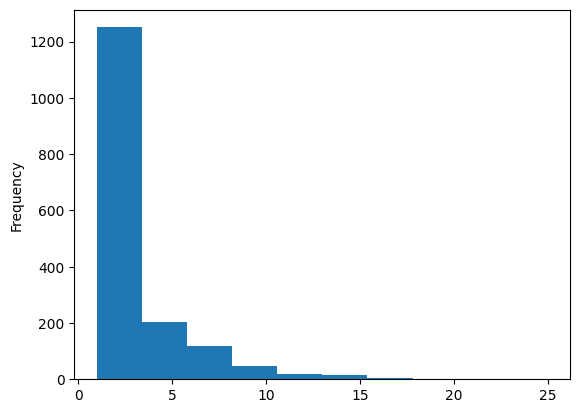

In [28]:
df_filtered.groupby('post').count().sort_values('author', ascending=False)['author'].plot(kind='hist', bins=10)